# Udacity Data Analyst Nanodegree Project: Investigate a Dataset of Medical appointments in Brazil"

# By Brahim Bergougui 
# July 17, 2020

## Table of Contents
<ul>
<li><a href="#intro"> Introduction</a></li>
<li><a href="#wrangling"> Data Wrangling</a></li>
<li><a href="#eda"> Exploratory Data Analysis</a></li>
<li><a href="#conclusions"> Conclusions</a></li>
</ul>

<a id='intro'></a>
## (I) Introduction

In this project i will analysis dataset called [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) which contains information about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
Here are a brief overview  for 14 variables (characteristics) were used in this dataset

- **`PatientId`**: Identification of a patient 
- **`AppointmentID`**: Identification of each appointment
- **`Gender`**:  patient's gender (M/F)     
- **`ScheduledDay`**: The day of the actuall appointment, when they have to visit the doctor.
- **`AppointmentDay`**:The day someone called or registered the appointment, this is before appointment of course.
- **`Age`**: How old is the patient.
- **`Neighborhood`**: Where the appointment takes place (location of hospital).
- **`Scholarship`**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- **`Hipertension`**: indicates whether or not the patient is experiencing Hypertension.
- **`Diabetes`**: indicates whether or not the patient is experiencing Diabetes.
- **`Alcoholism`**: indicates whether or not the patient is experiencing Alcoholism.
- **`Handcap`**: indicates whether or not the patient is with special needs.
- **`SMS_received`**: indicates whether or not the patient has received a reminder text message.
- **`Show-up`**: This is our main varaible. ‘No’ if the patient showed up to their appointment, other wise 'yes'

In [2]:
### Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly 
plotly.tools.set_credentials_file(username='Ibrahim1988', api_key='BAC.1177')
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
import pandas as pd
import numpy as np
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from plotly.subplots import make_subplots

<a id='wrangling'></a>
## II. Data Wrangling

In this section i will check for cleanliness, if there is any.  I will  trim and clean the dataset for analysis.

### 1. General Properties


In [3]:
#Importing the Data
df = pd.read_csv('no show appointments.csv')

In [4]:
# Viewing the dataset
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


By looking at the table above, we can notice that there are two column names written in Spanish ("Hipertension", "Handcap") and that all the column names start with capital letters. which need to correct in next part.

In [5]:
# number of Rows (Appointments)
print("\nNumber of Appointments=",df.shape[0]) 
# number of Columns (Variables)
print("\nNumber of Variables=",df.shape[1])


Number of Appointments= 110527

Number of Variables= 14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


from the information table above we can see that there are some columns need to convert their datatype such as "scheduled_day"

### 2. Data Cleaning ( Rename/Missing/Duplicated/Incorrect Data type!)

### 2.1.  Rename our column names

In [7]:
# here we will change the name of two columns to english ("Hipertension", "Handcap") and the column names to  lower letters 
df.rename(columns={"PatientId": "patient_id","AppointmentID": "appointment_id", "Gender":"gender", "ScheduledDay": "scheduled_day", "AppointmentDay": "appointment_day", "Day": "day","Age": "age", "Neighbourhood":"neighbourhood","Scholarship":"scholarship", "Hipertension": "hypertension","Diabetes":"diabetes","Alcoholism":"alcoholism", "Handcap": "handicap","SMS_received":"sms_received","No-show":"appointment_status"}, inplace=True)

In [8]:
# let's confirm that column name  have changed
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment_status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### 2.2. Check if there are any missing values

In [9]:
df.isnull().sum()

patient_id            0
appointment_id        0
gender                0
scheduled_day         0
appointment_day       0
age                   0
neighbourhood         0
scholarship           0
hypertension          0
diabetes              0
alcoholism            0
handicap              0
sms_received          0
appointment_status    0
dtype: int64

As can be seen from the table above  we do not have any  missing values in our dataset.

## 2.3. Check if there are any duplicates

In [10]:
#check for duplicates 
print("\nNumber of duplicates=",df.duplicated().sum())


Number of duplicates= 0


The results indicate that we do not have any duplicates in our dataset

### 2.4. Incorrect data type or value

### 2.4.1. Incorrect data value

In [11]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


from there table above we can clearly see that the min value of "age" is -1 which is has two explanation. First, The patient is a fetus that has not been born yet so (-1) indicates that. Second, it an error was made. Thus we are going to consider it as an error because it's only one observation dropping it from "age" column.

In [12]:
df = df[df.age != -1]
df["age"].min()

0

### 2.4.2. Data type 

In [13]:
df.dtypes
print("\ndata trype: \n", df.dtypes)

patient_id            float64
appointment_id          int64
gender                 object
scheduled_day          object
appointment_day        object
age                     int64
neighbourhood          object
scholarship             int64
hypertension            int64
diabetes                int64
alcoholism              int64
handicap                int64
sms_received            int64
appointment_status     object
dtype: object


data trype: 
 patient_id            float64
appointment_id          int64
gender                 object
scheduled_day          object
appointment_day        object
age                     int64
neighbourhood          object
scholarship             int64
hypertension            int64
diabetes                int64
alcoholism              int64
handicap                int64
sms_received            int64
appointment_status     object
dtype: object


In [14]:
# Check for zero/negative patient_id
print('patient_id:',df.patient_id.unique())

patient_id: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]


In [15]:
# Check for zero/negative appointment_id
print('appointment_id:',df.appointment_id.unique())

appointment_id: [5642903 5642503 5642549 ... 5630692 5630323 5629448]


In [16]:
# Check the values in the Gender column
print('gender:',df.gender.unique())

gender: ['F' 'M']


In [17]:
print('scheduled_day:',df.scheduled_day.unique())

scheduled_day: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


In [18]:
print('appointment_day:',df.appointment_day.unique())

appointment_day: ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']


In [19]:
print('age:',sorted(df.age.unique()))

age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [20]:
print('neighbourhood',sorted(df.neighbourhood.unique()))

neighbourhood ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA H

In [21]:
print('scholarship',df.scholarship.unique())

scholarship [0 1]


In [22]:
print('hypertension',df.hypertension.unique())

hypertension [1 0]


In [23]:
print('diabetes',df.diabetes.unique())

diabetes [0 1]


In [24]:
print('alcoholism',df.alcoholism.unique())

alcoholism [0 1]


In [25]:
print('handicap',df.handicap.unique())

handicap [0 1 2 3 4]


As can be seen in **`handicap`** column, it has 5 values (0,1,2,3,4)

In [26]:
print('sms_received',df.sms_received.unique())

sms_received [0 1]


In [27]:
print('Appointment Status',df.appointment_status.unique())

Appointment Status ['No' 'Yes']


According to the results above let's refresh our dataset to make the analysis part more readble

In [28]:
df['patient_id'] = (df['patient_id']).astype('int64')
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['gender'] = df.gender.astype('category')
df.gender.cat.rename_categories(['Female','Male'], inplace = True)
df['scholarship'] = df.scholarship.astype('category')
df.scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)
df['hypertension'] = df.hypertension.astype('category')
df.hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)
df['diabetes'] = df.diabetes.astype('category')
df.diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);
df['alcoholism'] = df.alcoholism.astype('category')
df.alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);
df['sms_received'] = df.sms_received.astype('category')
df.sms_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);
df['appointment_status'] = df.appointment_status.astype('category')
df.appointment_status.cat.rename_categories(['arrived','not_arrived'], inplace = True)
df['handicap'] = df.handicap.astype('category')
df.handicap.cat.rename_categories(['Handicap_00','Handicap_01','Handicap_02', 'Handicap_03', 'Handicap_04'], inplace = True);

The **`age`** variable is continuous, in order to present it in an informative way, let's create new column called  **`age_groups`**

In [29]:
category = pd.cut(df.age,bins=[-1,2,17,65,116],labels=['Baby','Child','Adult','Elderly'])
df.insert(5,'age_group',category)
df.age_group.cat.categories

Index(['Baby', 'Child', 'Adult', 'Elderly'], dtype='object')

<a id='eda'></a>
## III) Exploratory Data Analysis


### Research Question 1 ( What is the percentage of patients by Appointment Status?)

In [30]:
def  Appointment_Status_Bar_Plot(df, bygroup):
    df_by_Group=pd.crosstab(df[bygroup], df.appointment_status, normalize='index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = False, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('Percentage of Appointment Status of Patients (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [31]:
df.groupby('appointment_status', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='appointment_status', values='patient_id', title='Percentage of Patients by Appointment Status');

- **`Looking at the pie chart above, the percentage of patients who did attend to  their appointment is 79.8%. While the percentage of patients who did not attend to their appointment is 20.2% `**


- **`First conclusion  is that most of the patients (more than 75%) have showed up in their appointment `**

### Research Question 2  (Does the age  affects  patients to attend their appointment?)

In [32]:
df.groupby('age_group', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='age_group', values='patient_id', title='Percentage of Patients by Age Group')

- **`Looking at the pie chart above, we find that highest appointment rate goes to Adults with 63.2%. After Adults comes Child  group next with 18%. the last two smallest group by appointment are Elderly and Baby with appointment rate 12% and 6.72% respectively`**


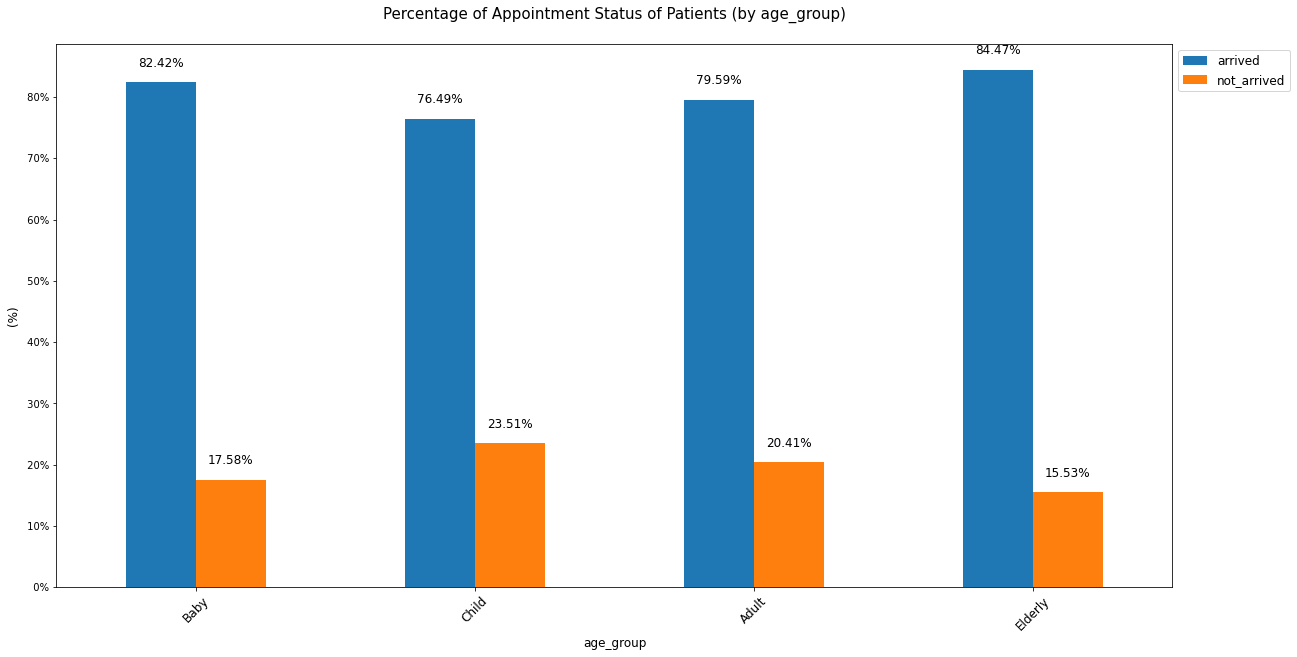

In [33]:
df_gender= Appointment_Status_Bar_Plot(df, 'age_group')

- **`Based on the pie charts and  analysis above, we found the following results:  `**


- **` 1- The highest Show-up rate goes to  Elderly (60 - 115) group with 85.5%. where the lowest show-up rate goes to Child   (3 - 17) with 76.5%.  `**


- **` 2- The No Show-up rate for Child (3 - 17)  is the highest with 23.5%. where the no show-up rate for Elderly (60 - 115) is the lowest with 15.53%.  `**

  - **`From these two results we can end up that  the age does not  affects patients to attend their appointment. as the results cleary indicate that the Elderly patients is the highest group  who have showed up  in their appointment and also it is the lowest group who have missed their appointment `**

# Research Question 3  (What are the proportions of patients' Gender by Appointment Status?)

In [34]:
df.groupby('gender', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='gender', values='patient_id', title='Percentage of Patients by Gender')

- **`Looking at the pie chart above, the percentage of Female patients is 65%. While the percentage of Male patients 35%.`**


- **`we can conclude that most of the patients (more than 60%) are female.`**

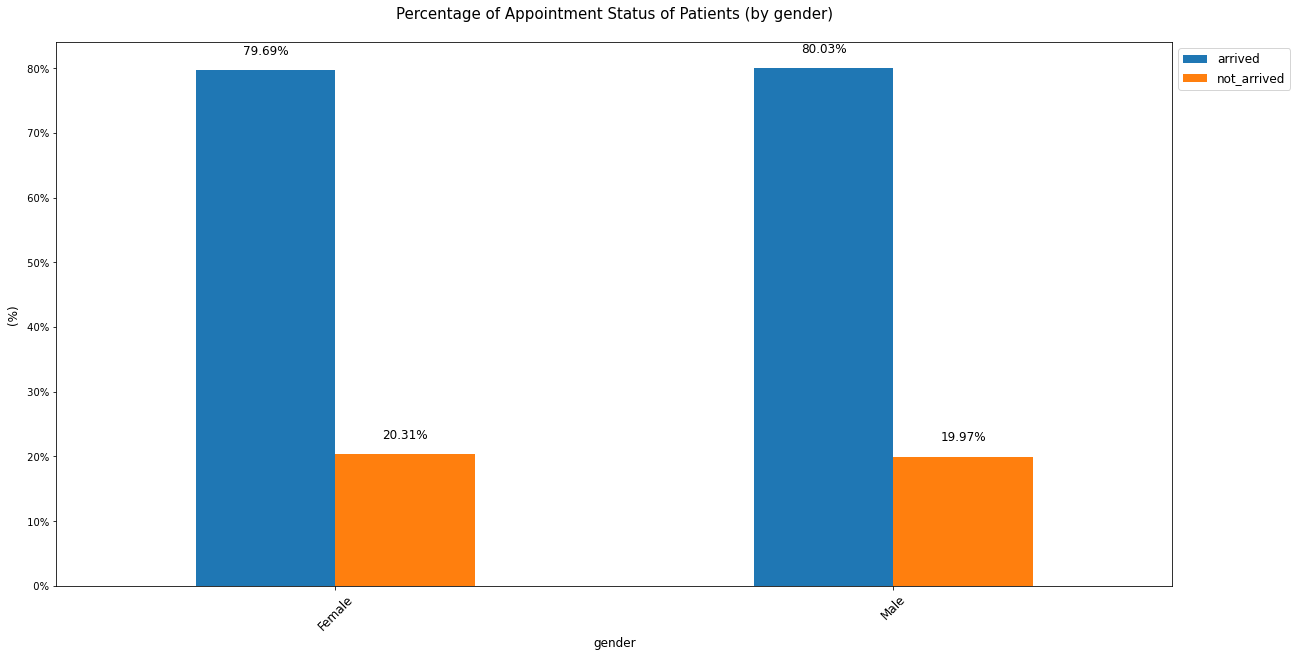

In [35]:
df_gender= Appointment_Status_Bar_Plot(df, 'gender')


  - **` Based on the pie charts and analysis above,we can conclude that:`**


  - **` Male and female are quietly same in show up in thier appointment. Male with Show-up rate equal to 80% while for female is 79.79%`**


  - **` We can also conclude that patients' gender does not affects them to attend their appointment.`**


### Search Question 4 (What are the Percentage of Patients with health condition problems "hypertension, diabetes, alcoholism and	handicap"  by Appointment Status? 

I will break down the quesion 4 into four sub questions as fellow

> **Q 4.1:** What are the Percentage of Patients with hypertension by Appointment Status

In [36]:
df.groupby('hypertension', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='hypertension', values='patient_id', title='Percentage of Patients by Hypertension')

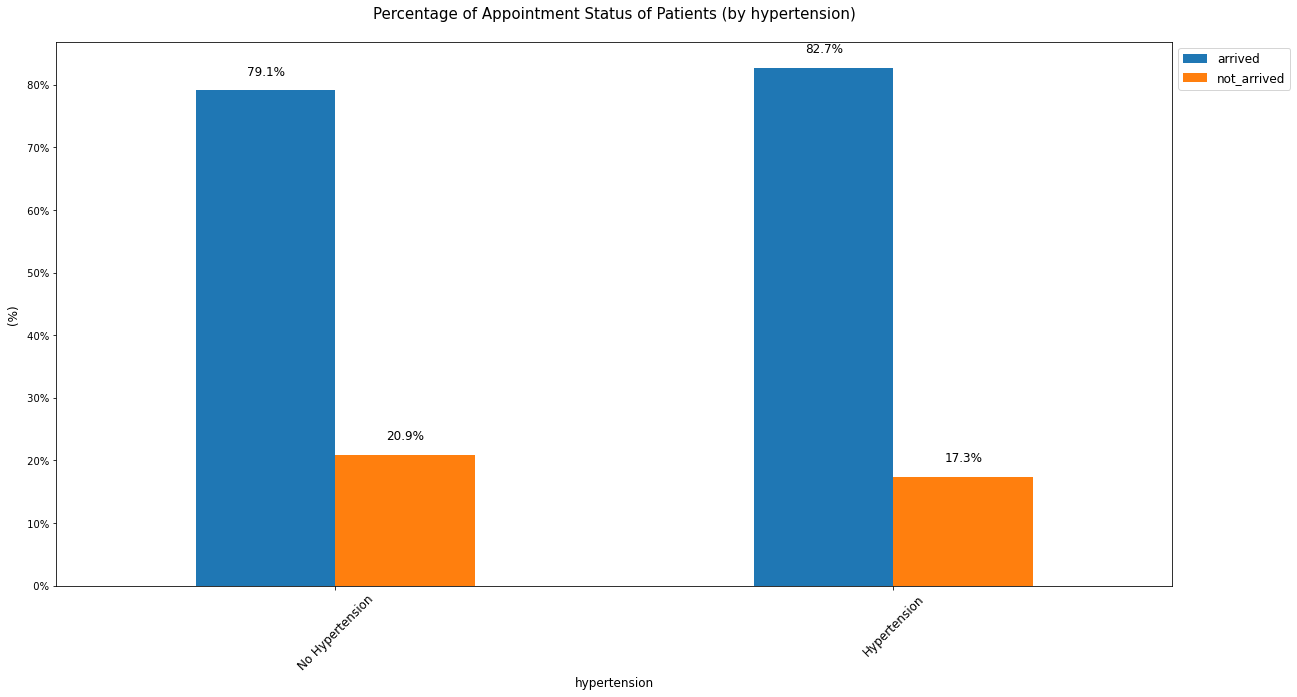

In [37]:
df_gender= Appointment_Status_Bar_Plot(df, 'hypertension')

- **` Based on the bar chart and analysis above, we found the following results:`**

- **` The highest Show-up rate goes to patients who have Hypertension with 82%. While the lowest show-up rate goes to patients who do not have Hypertension with 79%`**

**The hypertension indicator is quiet important factor that affect patients to whether show or not show up in their appointment**

> **Q 4.2:** What are the Percentage of Patients with diabetes by Appointment Status

In [38]:
df.groupby('diabetes', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='diabetes', values='patient_id', title='Percentage of Patients by Hypertension')

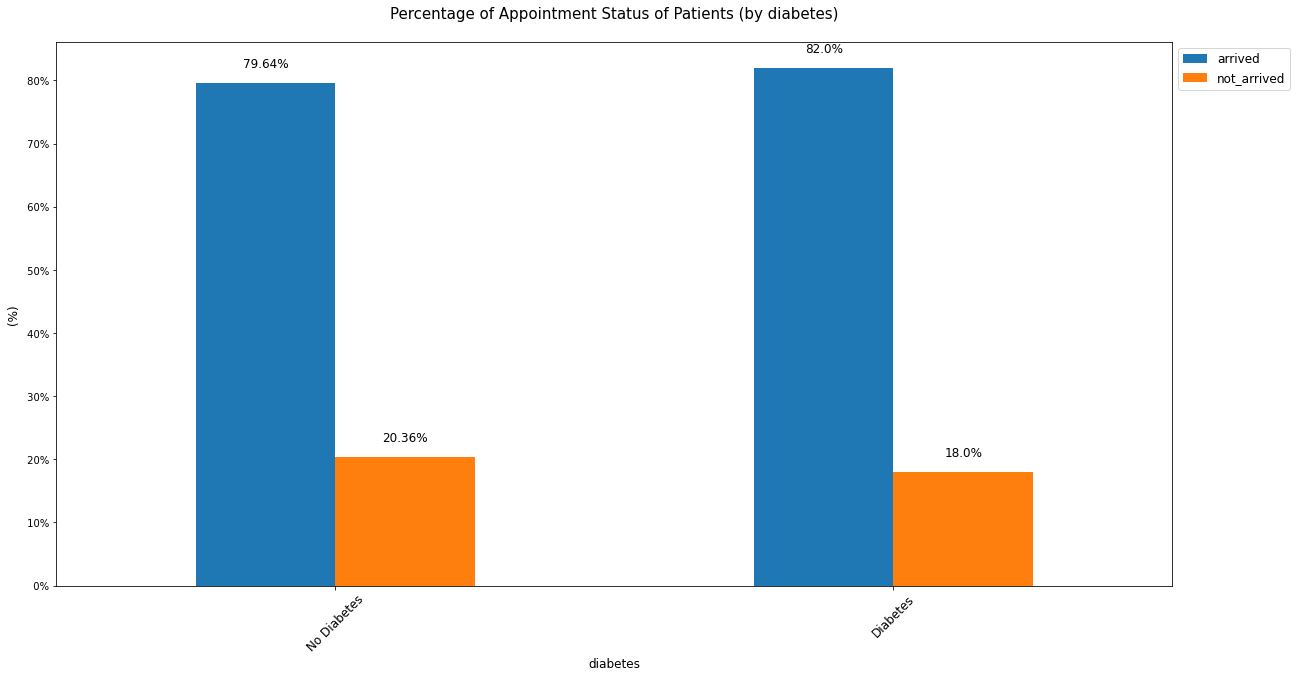

In [39]:
df_diabetes= Appointment_Status_Bar_Plot(df, 'diabetes');

- **` Based on the bar bar and analysis above,we can conclude that:`**


- **`Patient with diabetes have higher Show up rate in their appointment (82%) than Patient who do not have diabetes (80%).`**

> **Q 4.3:** What are the Percentage of Patients with Alcoholism by Appointment Status

In [40]:
df.groupby('alcoholism', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='alcoholism', values='patient_id', title='Percentage of Patients by Hypertension')

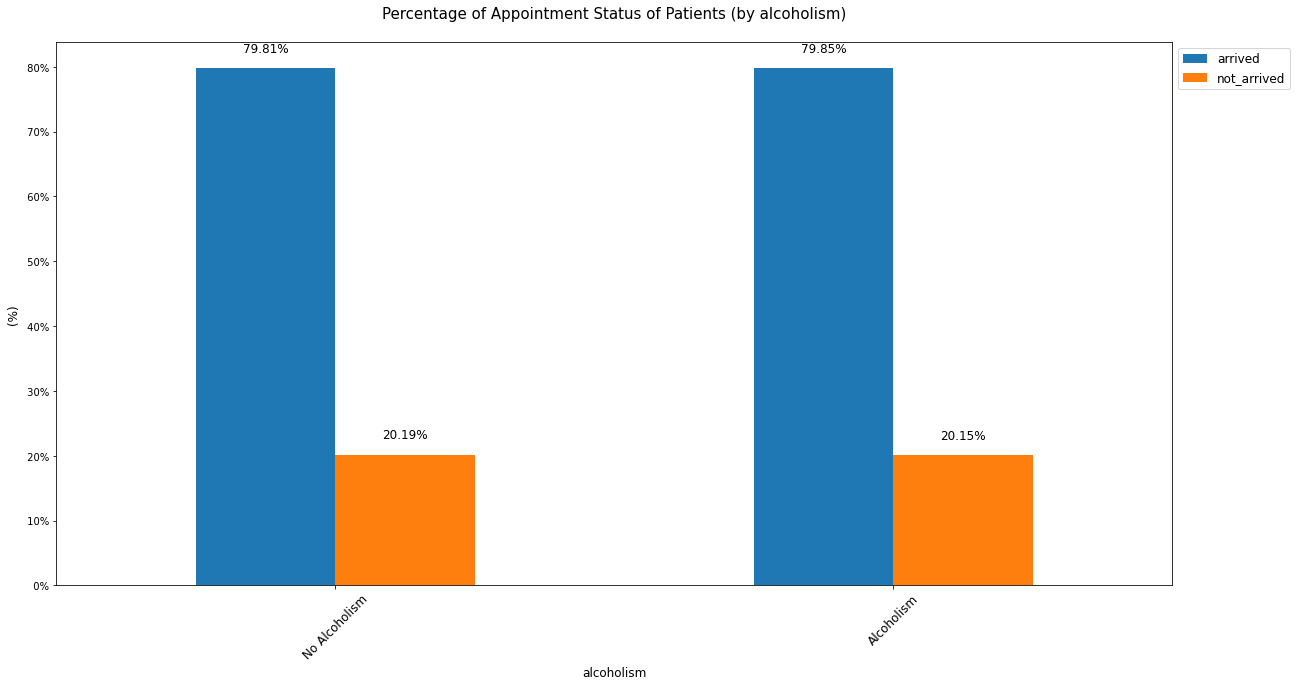

In [41]:
df_diabetes= Appointment_Status_Bar_Plot(df, 'alcoholism')

- **`Based on the bar charts and analysis above,we can conclude that:`**


- **`Patient who experienced Alcoholism and whose not are  quietly same in show up in thier appointment. For who experienced Alcoholism their Show-up rate equal to 80%, while for who did not experienced Alcoholism is 79.79%. and same analysis goes to No Show-up rate`**


**We can also conclude that  whether or not the patient is experiencing Alcoholism is not affecting them show up in their appointment**

>**Q 4.4:** What are the Percentage of Patients with Handicap by Appointment Status

In [42]:
df.groupby('handicap', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='handicap', values='patient_id', title='Percentage of Patients by Hypertension')

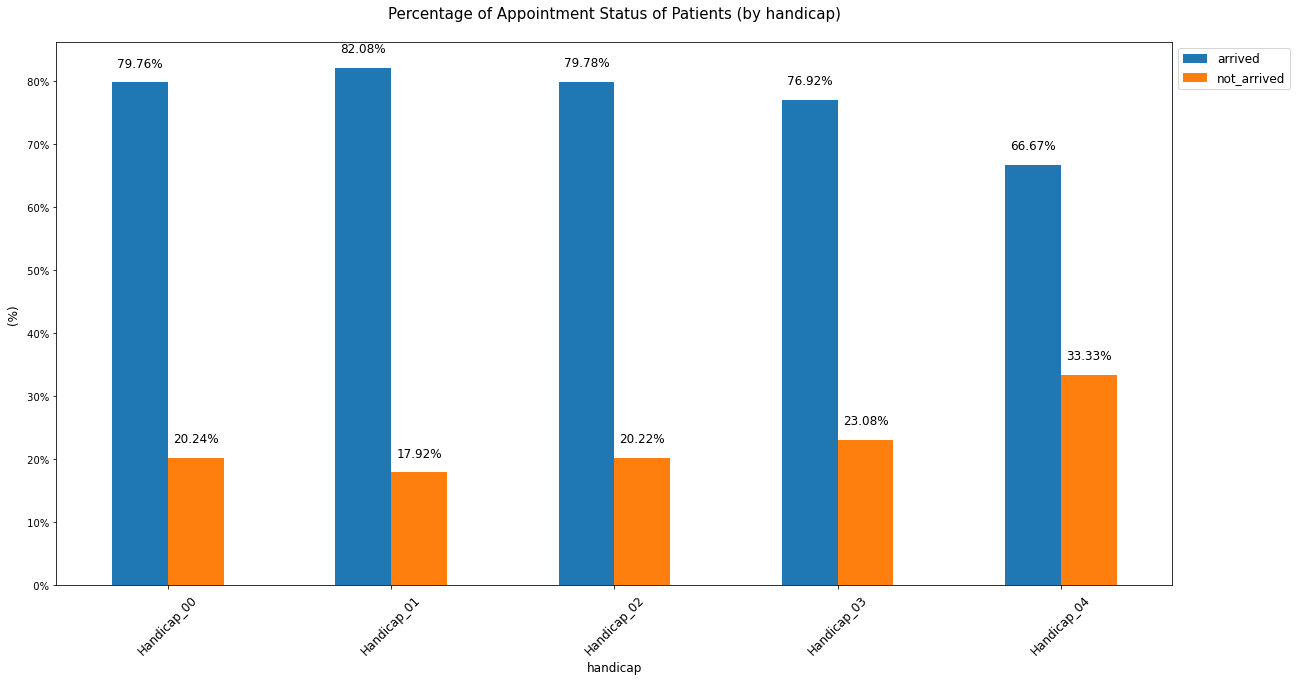

In [43]:
df_diabetes= Appointment_Status_Bar_Plot(df, 'handicap')

Based on the bar chart and  analysis above, we found the following results:

1- The highest Show-up rate goes to  Handcap 01 patients  with 82%. where the lowest show-up rate goes  to  Handcap 04 patients with 67%

2- The No Show-up rate for Handcap 04  is the highest with 33%. Where the no show-up rate for Handcap 01 is the lowest with 18%.

From these two results we can conclude that  the handicap rating affects patients to not attend  their appointment. as the results cleary indicate that the  Handcap patients in level 4  is the  lowest  who have not showed up  in their appointment and also it is the highest  who have missed their appointment.

>**The degree of handicapness it is an important factor that affect patients to whether show or not show up in their appointment**

### Research Question 5  (Does Sending Patients  a reminder text message affect to attend their appointment )


In [44]:
df.groupby('sms_received', as_index=False)['patient_id'].count().iplot(
        kind='pie', labels='sms_received', values='patient_id', title='Percentage of Patients by SMS Received/Not Received')

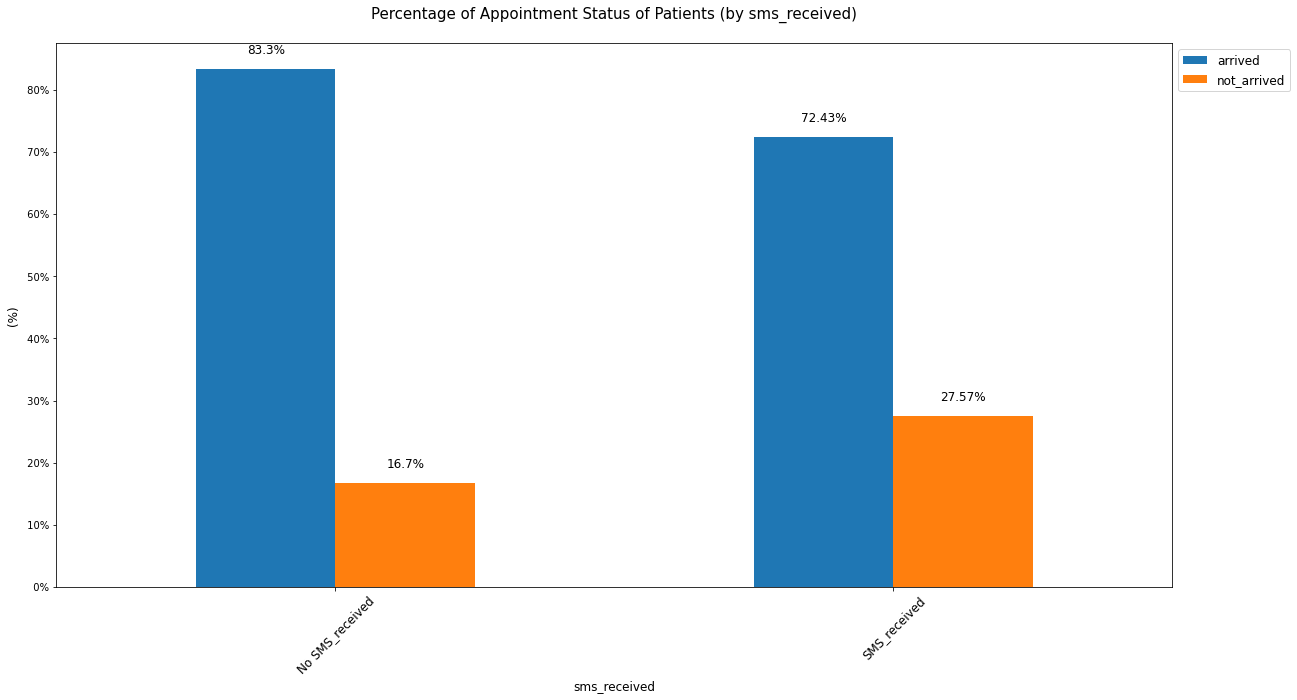

In [45]:
df_diabetes= Appointment_Status_Bar_Plot(df, 'sms_received')

Based on the bar chart and analysis above, we found the following results:

1- The highest Show-up rate goes to Patients who did not receive SMS  with 83%. While the lowest show-up rate goes to Patients who did receive SMS s with 72%

2- The No Show-up rate for Patients who did not receive SMS is the Lowest with 17%. While the no show-up rate for  Patients who receive SMS  is the highest with 28%.

> **Accodring to these results we can conclude that sending Patients a reminder text message does not affect to attend their appointment**


<a id='conclusions'></a>
## IV) Conclusions

> **Limitations:**

As Most of the Variables (columns) represent categorical data (and within these categorical data, most of it are binary data). Our Analyses were limited only on using bar and pie charts which are suitable for categorical data. Thus, we are unable to use other chats such as scatter plot which only used in visualize quantitative data.

> **Preliminary Questions**

In this essay i amied at answering five main questions:

>> **Q.01-** What is the percentage of patients by Appointment Status?

>> **Q.02-** Does the age affects patients to attend their appointment?

>> **Q.03-** What are the proportions of patients' Gender by Appointment Status?

>> **Q.04-** What are the Percentage of Patients with health condition problems "hypertension, diabetes, alcoholism and handicap" by Appointment Status?

>> **Q.05-**. Does Sending Patients a reminder text message affect to attend their appointment?

Asking these questions give us an idea of what factors that they may be affect patients whether to miss or attend their appointments. 

> **Preliminary Findings**:

>> **A.01-** In overall, most of the patients (more than 75%) have showed up in their appointment.

>> **A.02-** The age does not affects patients to attend their appointment. as the results indicate that the Elderly patients is the highest group who have showed up in their appointment (85.5%) and also it is the lowest group who have missed their appointment.

>> **A.03-** Male and female are quietly same in show up in their appointment. Male with Show-up rate equal to 80% while for female is 79.79%. We can conclude that patients' gender does not affects them to attend their appointment.

>> **A.04-**

>>> **A.04.1-** The highest Show-up rate goes to patients who have Hypertension with **82%**. While the lowest show-up rate goes to patients who do not have Hypertension with **79%**.


>>> **A.04.2-** Patient with diabetes have higher Show up rate in their appointment **(82%)** than Patient who do not have diabetes **(80%)**.

>>> **A.04.3-** Patient who experienced Alcoholism and whose not are quietly same in show up in thier appointment. For who experienced Alcoholism their Show-up rate equal to **80%**, while for who did not experienced Alcoholism is **79.79%**. and same analysis goes to No Show-up rate.

>>> **A.04.4-** The handicap rating affects patients to not attend their appointment. as the results indicate that the Handcap patients in level 4 who have showed up in their appointment is the lowest **67%** and also it is the highest for who have missed their appointment **33%**. The degree of handicapness it is an important factor that affect patients to whether show or not show up in their appointment

>> **A.05-** The highest Show-up rate goes to Patients who did not receive SMS with **83%**. While the lowest show-up rate goes to Patients who did receive SMS s with **72%**. We can conclude that sending Patients a reminder text message does not affect to attend their appointment


